## Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [11]:
#импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
from datetime import datetime, timedelta
import dateutil.relativedelta
import calendar


%matplotlib inline

In [2]:
#готовим основной датасет, объединив 4 файла csv (кроме students.csv). Файл progress_phases.csv основной, поэтому объединение 
# начала с него.

#читаем csv файлы и преобразуем в DataFrame
progress_phases = pd.read_csv('progress_phases.csv', encoding = 'utf-8') 
progresses = pd.read_csv('progresses.csv', encoding = 'utf-8')

#чтобы после объединения не было 2-х колонок с одинаковыми значениями, необходимо, чтобы в 2 файлах были колонки с одинаковыми 
# заголовками
progresses.rename (columns = {'id':'progress_id'}, inplace = True)

#объединяем 2 файла: left, т.к. необходимо взять все значения из 1го файла, а из 2го лишь то, что есть в 1м; 
#ориентируемся на столбик progress_id при объединении
progress_phases_progresses = pd.merge (progress_phases, progresses, how = 'left', on = 'progress_id') 

#далее проделала те же самые шаги с другими файлами
course_contents = pd.read_csv ('course_contents.csv',encoding = 'utf-8')
courses = pd.read_csv ('courses.csv',encoding = 'utf-8')
courses.rename (columns = {'id':'course_id'}, inplace = True)
courses_contents = pd.merge (course_contents, courses, how = 'left', on = 'course_id')
courses_contents.drop ('Unnamed: 0', axis = 'columns', inplace = True)  #удаляем ненужный столбик

#финальный датасет
main = pd.merge (progress_phases_progresses, courses_contents, how = 'left', on = ['module_number', 'lesson_number', 'course_id']) 

main[main.is_homework == True].head()          


,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,title,field
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,Веб-дизайн PRO 2.0,Design
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00,NaN,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,Веб-дизайн PRO 2.0,Design
12,a97393fe164b448e7231c07d48c82f9e,2,6,start,2018-03-11 14:14:44.814222+00,NaN,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Исследование целевой аудитории: портретировани...,Домашняя работа,bae729ef-e399-4ed8-a62b-c8195ed754aa,False,True,Интернет-маркетолог от Ingate,Marketing
17,a97393fe164b448e7231c07d48c82f9e,1,7,done,2018-02-19 12:30:34.638431+00,2018-02-20 09:16:50.297369+00,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,Интернет-маркетолог от Ingate,Marketing
29,000962791295398b5ec7bc24f05269ac,7,5,done,2018-10-02 19:41:04.983571+00,2018-10-05 17:02:51.913911+00,fcd7b6853c2582372980dd6af56d3bdc,e3a0df907589d56692b5cb561fd90d87,Основы работы с графикой,Домашняя работа,e362bb6e-4ab4-4533-985e-d728300e4c32,False,True,Веб-дизайн с нуля 2.0,Design


In [3]:
# Задание 1.1

#общее количество курсов в датасете считаю при помощи функции unique из библиотеки numpy
total_courses = len(np.unique(main['title'])) 
total_courses

15

In [4]:
# Задание 1.1

#в исходном датасете указаны номера модулей. Следовательно, найдя максимальный номер модуля, мы узнаем, сколько всего 
#модулей на курсе

modules_by_courses = pd.DataFrame(main.groupby('title')['module_number'].agg ('max'))
modules_by_courses.columns = ['Общее количество модулей']
modules_by_courses

,Общее количество модулей
title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


In [5]:
# Задание 1.1

#считаем количество уроков в каждом модуле на каждом курсе 
lesson_number = pd.DataFrame(main.groupby (['title','module_title'])['lesson_number'].agg ('max'))
lesson_number.columns = ['Общее количество уроков']

lesson_number

Общее количество уроков
title                         module_title                                                               
Excel Базовый                  Визуализация данных Excel                                                5
                              Основной функционал Excel                                                11
                              Основной функционал Excel (продолжение)                                   7
                              Сводные таблицы Excel                                                     5
                              Формулы и функции Excel. Более сложные формулы                            5
...                                                                                                   ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                         5
                              Требовательность digital-продюсера                                        4
                              Управление временем                                                       4
                              Управление дизайнерами. Разработка дизайна по s...                        7
                              Экологичный путь менеджера                                                4

[229 rows x 1 columns]

In [6]:
# Задание 1.1

#рассчитываем медианное количество уроков в каждом модуле на каждом курсе 
median_lesson = pd.DataFrame(main.groupby (['title','module_title'])['lesson_number'].agg ('median').astype('int'))
median_lesson.columns = ['Медианное количество уроков']

median_lesson

Медианное количество уроков
title                         module_title                                                                   
Excel Базовый                  Визуализация данных Excel                                                    3
                              Основной функционал Excel                                                     5
                              Основной функционал Excel (продолжение)                                       4
                              Сводные таблицы Excel                                                         3
                              Формулы и функции Excel. Более сложные формулы                                3
...                                                                                                       ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                             3
                              Требовательность digital-продюсера                                            2
                              Управление временем                                                           2
                              Управление дизайнерами. Разработка дизайна по s...                            4
                              Экологичный путь менеджера                                                    2

[229 rows x 1 columns]

In [7]:
# Задание 1.1

#рассчитываем общее количество студентов на курсах. Для этого:
#удаляем дубликаты, так как внутри одного курса несколько модулей, на которые могут быть записаны одни и те же студенты;
#группируем датасет по названию курса и применяем агрегирующую функцию count;
#сортируем по убиванию.

student_number = main.loc[:, ['title', 'student_id']] \
                .drop_duplicates() \
                .groupby('title') \
                .agg('count') \
                .sort_values('student_id', ascending = False) 
                
student_number.columns = ['Количество студентов на курсе']
student_number

,Количество студентов на курсе
title,
Интернет-маркетолог от Ingate,2168
Веб-дизайн с нуля 2.0,2014
Веб-вёрстка для начинающих 2.0,2004
Веб-дизайн PRO 2.0,1711
UX-дизайн,1151
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
Excel Базовый,782
Java-разработчик,763


In [8]:
# Задание 1.1

#готовим столбик с возрастом
students = pd.read_csv('students.csv', encoding = 'utf-8')
students_main = main.loc[:, ['title', 'student_id']].drop_duplicates()
students = students.rename(columns = {'id':'student_id'})
students = pd.merge(students_main, students, how = 'left', on = 'student_id')
students = students.loc [:, ['student_id', 'birthday']].dropna()
#столбик с датой рождения приводим к типу datetime64
students['birthday'] = students['birthday'].map(lambda x: np.datetime64(x))

#фильтруем таблицу:избавляемся от битых дат; я избавилась от слишком "молодых" и "взрослых студентов", так как иначе 
#максимальный возраст получается 100 лет, а минимальный 1 год.
students = students[students['birthday'].map (lambda x: np.datetime64(x, 'Y') > np.datetime64('1970-01-01',  'Y') 
                                              and np.datetime64(x, 'Y') < np.datetime64('2000-01-01',  'Y'))] 
                                               
#записываем сегодняшнюю дату в переменную today            
today = np.datetime64 ('today') 

#считаем возраст студентов
students['age'] = students['birthday'].map (lambda x: (today - x)/np.timedelta64(365, 'D'))

#считаем метрики возраста: максимум, минимум, среднее, медиану при помощи метода describe()
metrics=students['age'].describe()[['max', 'min', 'mean', '50%']].astype('int')

metrics

max     49
min     20
mean    30
50%     29
Name: age, dtype: int32

In [9]:
# Задание 1.1

#формируем датасет
students_main = main.loc[:, ['title', 'student_id']].drop_duplicates()
students_main = pd.merge(students_main, students, how = 'left', left_on = 'student_id', right_on = 'student_id')

#рассчитываем max, min, mean и median возраст на каждом курсе
students_main=students_main.loc[:,['title', 'age']].groupby('title').agg(['max', 'min', 'mean', 'median'])

students_main.astype('int')

age                
                                    max min mean median
title                                                  
Excel Базовый                        48  20   33     34
Java-разработчик                     49  20   30     29
Java-разработчик c нуля              49  20   30     29
JavaScript с нуля                    49  20   29     28
PHP-разработчик с 0 до PRO. Часть 1  49  20   29     29
SMM-маркетолог от А до Я             49  20   30     29
UX-дизайн                            49  20   30     30
Анимация интерфейсов                 49  20   30     29
Веб-вёрстка для начинающих 2.0       49  20   29     28
Веб-дизайн PRO 2.0                   49  20   29     28
Веб-дизайн Базовый                   48  20   29     28
Веб-дизайн с нуля 2.0                49  20   29     28
Веб-разработчик                      48  20   29     28
Интернет-маркетолог от Ingate        49  20   31     31
Руководитель digital-проектов        47  20   32     31

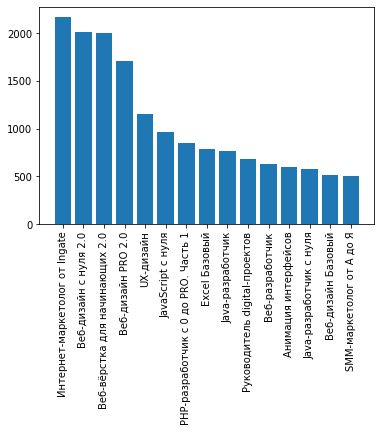

In [10]:
#Задание 1.2
# Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

fig,subplot = plt.subplots()

plt.xticks(np.arange(0,len(student_number.index)), rotation='vertical', labels=student_number.index)
subplot.bar(student_number.index, student_number.iloc[:,0].values)
plt.show()

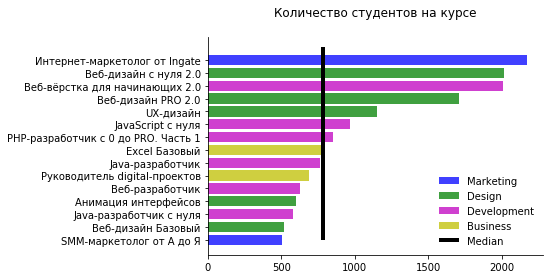

In [11]:
#Задание 1.3
# Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом 
# курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, 
# к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена 
# линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно 

fig,subplot = plt.subplots()

df = main.loc[:, ['title', 'student_id']].drop_duplicates ().groupby('title').agg('count')

df = pd.merge(df, courses, how='left', left_on='title', right_on='title')
df.sort_values('student_id', inplace = True)
df.set_index('title', inplace = True)

plt.yticks(np.arange(0, len(df.index)), labels=df.index)
subplot.set_title('Количество студентов на курсе\n')

for bar in range (0,len(df.index)):
    if df['field'][bar] == 'Marketing':
        marketing = subplot.barh(df.index[bar], df['student_id'][bar], color = 'b', alpha = 0.75) #если ставить значение прозрачности на 0.1, то ничего не видно.
    elif df['field'][bar] == 'Design':
        design = subplot.barh(df.index[bar], df['student_id'][bar], color = 'g', alpha = 0.75)
    elif df['field'][bar] == 'Development':
        development = subplot.barh(df.index[bar], df['student_id'][bar], color = 'm', alpha = 0.75)   
    elif df['field'][bar] == 'Business':
        business = subplot.barh(df.index[bar], df['student_id'][bar], color = 'y', alpha = 0.75) 

median = subplot.vlines(df['student_id'].median(), 0, len(df.index), linewidth = 4)
subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)

plt.legend((marketing, design, development, business, median), ['Marketing', 'Design', 'Development', 'Business', 'Median'], frameon = False)    
plt.savefig('Количество студентов на курсе.png', bbox_inches='tight')



Общее количество курсов, предлагаемых в образовательной программе составляет 15.Для того, чтобы понять, какой курс пользуется 
популярностью у студентов, проанализируем также количество студентов на каждом курсе. Ниже представлена таблица с названиями 
курсов и общим количеством студентов, обучающихся на том или ином курсе.

                                     Количество студентов на курсе
title                                                             
Интернет-маркетолог от Ingate                                 2168
Веб-дизайн с нуля 2.0                                         2014
Веб-вёрстка для начинающих 2.0                                2004
Веб-дизайн PRO 2.0                                            1711
UX-дизайн                                                     1151
JavaScript с нуля                                              966
PHP-разработчик с 0 до PRO. Часть 1                            854
Excel Базовый                                                  782
Jav

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


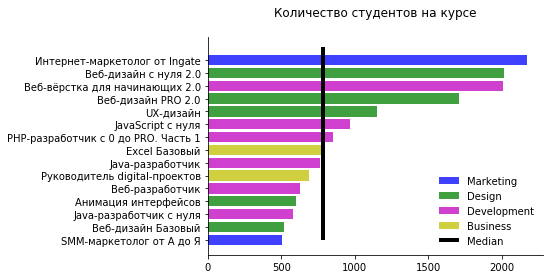


*******************************************************************************************************************************

Каждый курс состоит из нескольких модулей. Ниже представлена таблица c общим количество модулей на каждом курсе.

                                     Общее количество модулей
title                                                        
Excel Базовый                                               9
Java-разработчик                                           17
Java-разработчик c нуля                                     9
JavaScript с нуля                                          18
PHP-разработчик с 0 до PRO. Часть 1                         8
SMM-маркетолог от А до Я                                   11
UX-дизайн                                                  20
Анимация интерфейсов                                       21
Веб-вёрстка для начинающих 2.0                              8
Веб-дизайн PRO 2.0                                         17
Веб-дизайн Б

Общее количество уроков  \
title                         module_title                                                                  
Excel Базовый                  Визуализация данных Excel                                                5   
                              Основной функционал Excel                                                11   
                              Основной функционал Excel (продолжение)                                   7   
                              Сводные таблицы Excel                                                     5   
                              Формулы и функции Excel. Более сложные формулы                            5   
...                                                                                                   ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                         5   
                              Требовательность digital-продюсера                                        4   
                              Управление временем                                                       4   
                              Управление дизайнерами. Разработка дизайна по s...                        7   
                              Экологичный путь менеджера                                                4   

                                                                                  Медианное количество уроков  
title                         module_title                                                                     
Excel Базовый                  Визуализация данных Excel                                                    3  
                              Основной функционал Excel                                                     5  
                              Основной функционал Excel (продолжение)                                       4  
                              Сводные таблицы Excel                                                         3  
                              Формулы и функции Excel. Более сложные формулы                                3  
...                                                                                                       ...  
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                             3  
                              Требовательность digital-продюсера                                            2  
                              Управление временем                                                           2  
                              Управление дизайнерами. Разработка дизайна по s...                            4  
                              Экологичный путь менеджера                                                    2  

[229 rows x 2 columns]


Например, на модуле 'Основной функционал Excel' 50% студентов не успели освоить даже половину уроков.

*******************************************************************************************************************************

Также был проведен анализ аудитории, в результате которого было выяснено следующее:
Максимальный возраст студентов - 49 лет
Минимальный возраст студентов - 20 лет
Средний возраст студентов - 30 лет
Медианный возраст студентов - 29 лет


In [12]:
print(f"""Общее количество курсов, предлагаемых в образовательной программе составляет {total_courses}.Для того, чтобы понять, какой курс пользуется 
популярностью у студентов, проанализируем также количество студентов на каждом курсе. Ниже представлена таблица с названиями 
курсов и общим количеством студентов, обучающихся на том или ином курсе.\n""")
print(student_number)
print(f"\nНаиболее популярным курсом среди студентов, согласно представленной таблице, является '{np.argmax(student_number['Количество студентов на курсе'])}', который \nбыл выбран {student_number['Количество студентов на курсе'].max()} студентами.")
print("""\nДля большей наглядности была построена диаграмма, представляющая информацию о количестве студентов на каждом курсе, а также о 
сферах, к которым относится тот или иной курс.""")

display(Image(filename='Количество студентов на курсе.png')) 
   
print(f'\n{"*"*127}')

print('\nКаждый курс состоит из нескольких модулей. Ниже представлена таблица c общим количество модулей на каждом курсе.\n')
print(modules_by_courses)
print(f"\nКак видно из таблицы: наиболее разнообразным с точки зрения количества модулей является курс '{np.argmax(modules_by_courses['Общее количество модулей'])}', так как \nон состоит из наибольшего числа модулей, а именно {modules_by_courses['Общее количество модулей'].max()} модуля.")
print(f'\n{"*"*127}')

print("""\nКаждый модуль, в свою очередь, состоит из различного числа уроков. Несмотря на достаточно большое количество уроков в каждом 
модуле, не все студенты успели приступить ко всем урокам. Общее количество и медианное значение начатых уроков представлены 
в таблице ниже.""")

display(pd.merge(lesson_number, median_lesson, how='left', left_index = True, right_index = True))

print("""\nНапример, на модуле 'Основной функционал Excel' 50% студентов не успели освоить даже половину уроков.""")      
      
print(f'\n{"*"*127}')
print(f'''\nТакже был проведен анализ аудитории, в результате которого было выяснено следующее:
Максимальный возраст студентов - {metrics[0]} лет
Минимальный возраст студентов - {metrics[1]} лет
Средний возраст студентов - {metrics[2]} лет
Медианный возраст студентов - {metrics[3]} лет''')
      


## Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [13]:
#Задание 2.1
# Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до 
# июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

growth = main.loc[:, ['title', 'progress_id', 'is_homework', 'start_date']]
growth = growth[growth['is_homework'] == True]
growth = main.loc[:, ['title', 'progress_id', 'start_date']]
growth['start_date'] = growth['start_date'].map(lambda x: np.datetime64(x))
growth.sort_values('start_date', inplace = True)
growth = growth.groupby('progress_id').agg('min')
growth['start_date'] = growth['start_date'].map(lambda x: np.datetime64(x, 'M'))
growth['count_users'] = 1
growth = growth.groupby(['start_date','title']).agg('sum')

growth.head(15)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


count_users
start_date title                                     
2016-03-01 Веб-разработчик                          1
2016-11-01 UX-дизайн                                2
2017-01-01 Веб-дизайн Базовый                       1
2017-03-01 Веб-дизайн Базовый                       1
2017-04-01 UX-дизайн                                1
           Веб-разработчик                          1
2017-05-01 UX-дизайн                                1
           Руководитель digital-проектов            1
2017-06-01 UX-дизайн                                1
           Руководитель digital-проектов            1
2017-07-01 Анимация интерфейсов                     1
           Веб-разработчик                          1
2017-08-01 UX-дизайн                                2
           Интернет-маркетолог от Ingate            1
           Руководитель digital-проектов            1

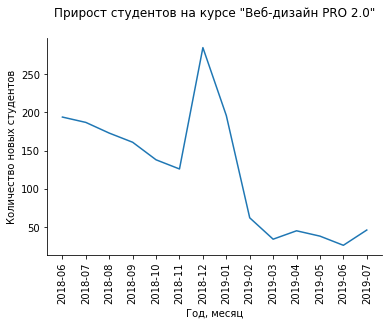

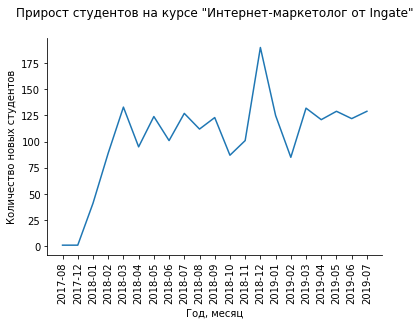

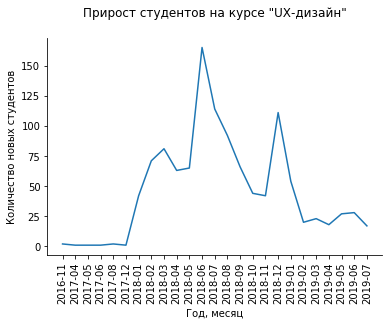

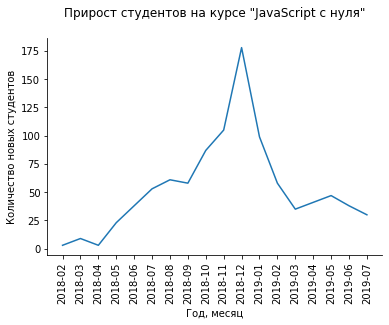

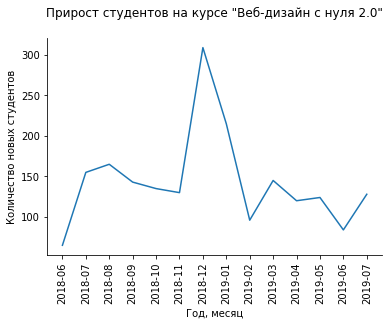

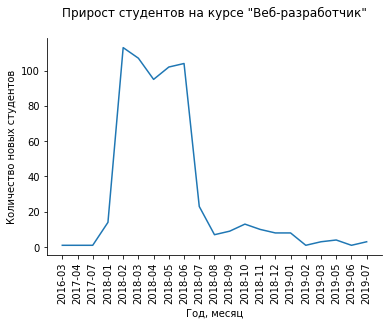

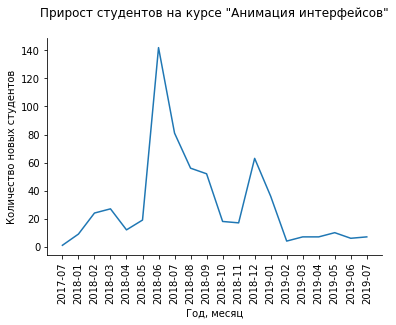

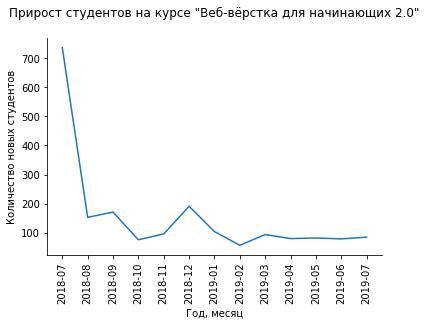

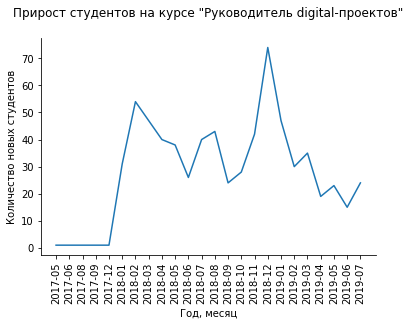

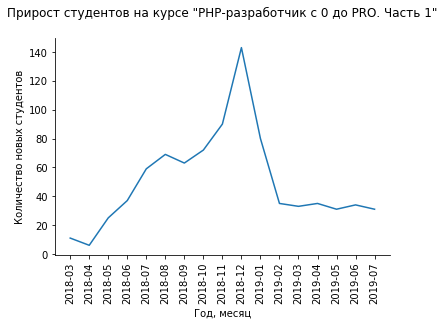

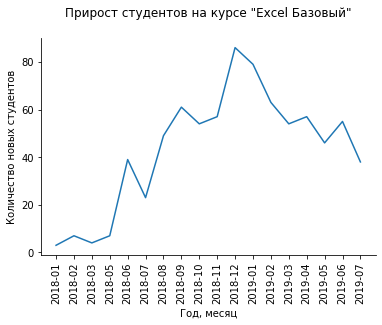

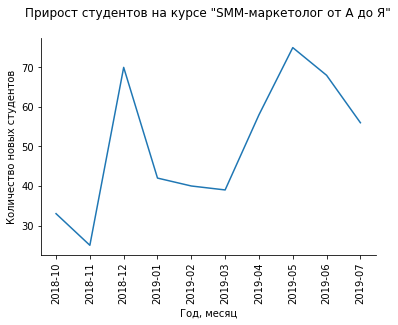

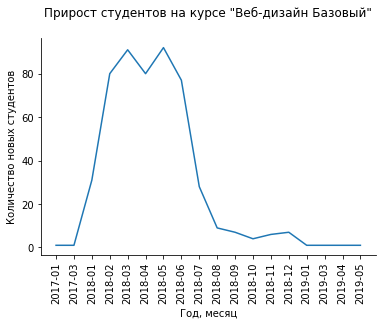

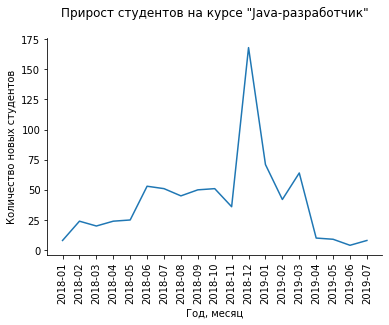

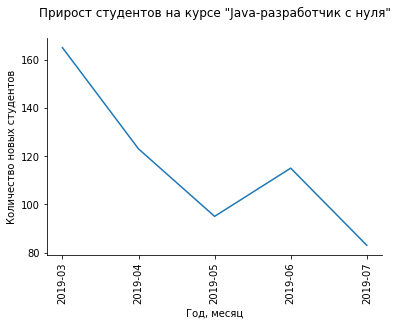

In [14]:
#Задание 2.2
# На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для 
# каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, 
# отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика 
# быть не должно

x = []
y = []

number_of_courses = list(dict.fromkeys(main['title'])) #количество курсов

for course in range (len(number_of_courses)):
    fig, subplot = plt.subplots()
    plt.xlabel('Год, месяц')
    plt.ylabel('Количество новых студентов')
    subplot.spines['right'].set_visible(False)
    subplot.spines['top'].set_visible(False)
    
    for row in range (0,len(growth)):
        if growth.index[row][1] == number_of_courses[course]:
            subplot.set_title(f'Прирост студентов на курсе "{number_of_courses[course]}"\n')
            y.append(growth.iloc[row][0])
            x.append(str(growth.index[row][0])[:7])

    plt.xticks(np.arange(0,len(x)), rotation='vertical', labels=x)
    
    subplot.set_title(f'Прирост студентов на курсе "{number_of_courses[course]}"\n')
    
    plt.plot(x,y)
    plt.savefig(f'Количество студентов на курсе {number_of_courses[course]}.png',bbox_inches='tight')
    x = []
    y = []


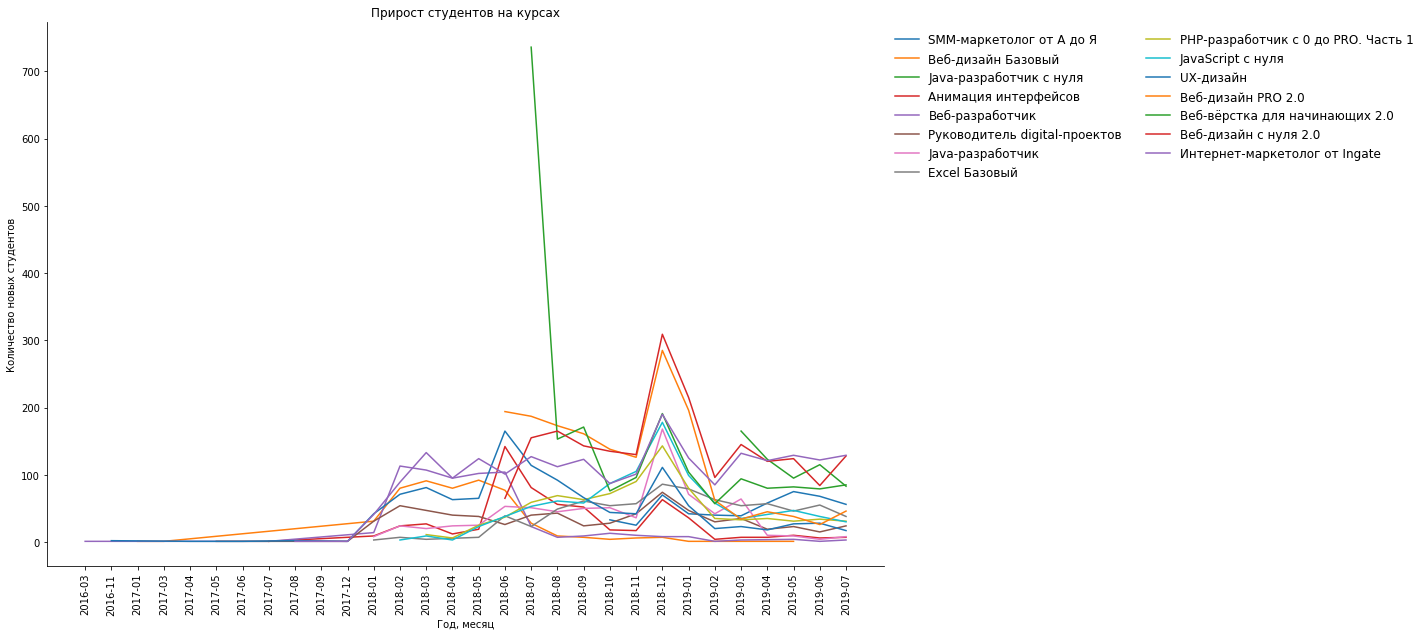

In [15]:
#Задание 2.3

%matplotlib inline

x = []
y = []

fig, subplot = plt.subplots(figsize=(15,10))
plt.xlabel('Год, месяц')
plt.ylabel('Количество новых студентов')
subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)
#subplot.set_ylim(0,400)

subplot.set_title('Прирост студентов на курсах')

date_list = []
for date in growth.index:
    date_list.append(str(date[0])[:7])
x_ticks = sorted(list(set(date_list)))     
    
plt.xticks(np.arange(0,len(x_ticks)), rotation='vertical', labels=x_ticks) 


for course in range (0,len(df.index)):
    for row in range (0,len(growth)):
        if growth.index[row][1] == df.index[course]:
            y.append(growth.iloc[row][0])
            x.append(x_ticks.index(str(growth.index[row][0])[:7]))
    
    plt.plot(x,y)
    x = []
    y = []

   
plt.legend([i for i in list(df.index)], frameon = False, ncol = 2, fontsize = 'large', bbox_to_anchor=(1, 1))
plt.savefig('Прирост студентов на курсах.png', bbox_inches='tight')

In [4]:
#Задание 2.4 
# Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 
# 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного 
# месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

#подготавливаем датасет для расчетов
progress_count = main[main['is_homework'] == True].loc[:, ['title', 'start_date', 'finish_date']]
progress_count.dropna(inplace = True)
# progress_count.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

#необходимо обновить нумерацию индексов, т.к. при срезе ранее она сбилась и это мешает при применении цикла for ниже
progress_count.reset_index(inplace = True, drop = True) 

#преобразуем строковые значение дат в в формат datetime 
progress_count['start_date'] = progress_count['start_date'].map(lambda x: datetime.strptime(x[:7], '%Y-%m'))
progress_count['finish_date'] = progress_count['finish_date'].map(lambda x: datetime.strptime(x[:7], '%Y-%m'))

#создаем списки, которые будут заполняться ниже для создания конечного датасета
titles=[] #название курса
date_labels=[] #месяц и год

#цикл для заполнения ранее объявленных списков
for row in range(len(progress_count)):
    test_start = progress_count.loc[row,'start_date']
    test_end = progress_count.loc[row,'finish_date']   
    
    #дата начала обучения уже покрывает месяц, поэтому сразу добавлям параметры в списки
    titles.append(progress_count.at[row,'title'])
    date_labels.append(test_start)
            
    # далее проверяем, равна ли дата начала дате окончания прогресса
    # если равна, то ничего не предпринимаем, т.к. ранее уже учли данную дату
    if test_start == test_end:
        continue
        
    else:          
        #если не равна, то вычитаем из даты окончания один месяц до тех пор, пока не дойдем до даты начала.
        #в это же время добавляем в соответствующие списки наименование курса; дату (год и месяц), которую
        #покрывает прогресс
        while test_end > test_start:
            test_end -= dateutil.relativedelta.relativedelta(months=1)
            
            if test_end == test_start:
                continue
            
            titles.append(progress_count.at[row,'title'])
            date_labels.append(test_end)
            
#создаем датафрейм из полученных списков и сортируем данные по дате            
progress_by_month = pd.DataFrame(list(zip(titles, date_labels)), columns = ['title', 'start_date'])
progress_by_month.sort_values(by = 'start_date', inplace = True)

#добавляем столбик для хранения количества прогрессов
progress_by_month['months_homework'] = 1

#преобразуем дату в формат год-название месяца
progress_by_month['start_date'] = progress_by_month['start_date'].map(lambda x: f'{str(x.year)[2:4]}-{calendar.month_name[x.month][:3]}')

#применяем агрегирующую функцию sum к полученному датасету. Получаем количество прогрессов на каждом курсе за каждый месяц
progress_by_month = progress_by_month.groupby(['start_date', 'title'], sort = False).agg('sum')

progress_by_month

months_homework
start_date title                                    
16-Mar     Веб-разработчик                         5
16-Nov     UX-дизайн                               4
16-Dec     UX-дизайн                               1
17-Feb     UX-дизайн                               2
17-Mar     Веб-дизайн Базовый                      3
...                                              ...
19-Jul     Веб-дизайн PRO 2.0                     85
           Анимация интерфейсов                    9
           UX-дизайн                              40
           SMM-маркетолог от А до Я               57
           Веб-разработчик                        12

[253 rows x 1 columns]

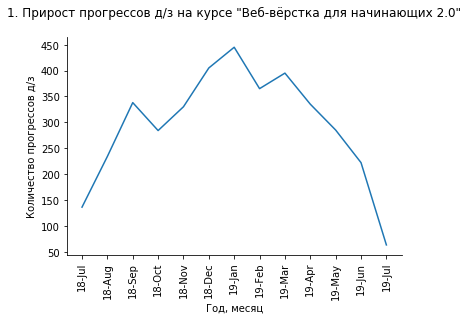

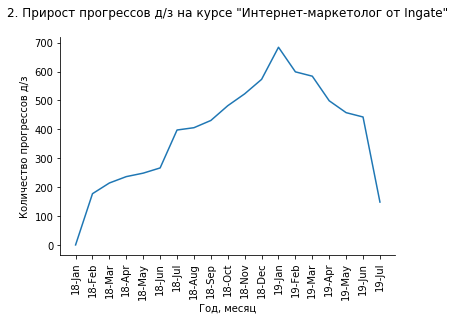

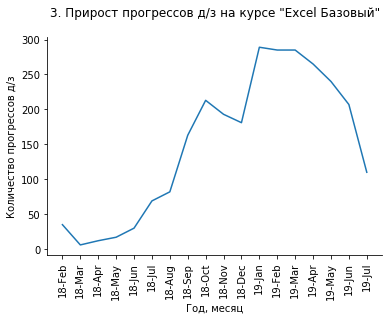

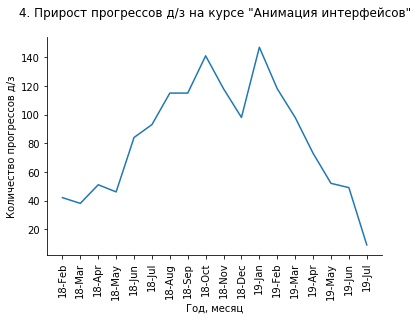

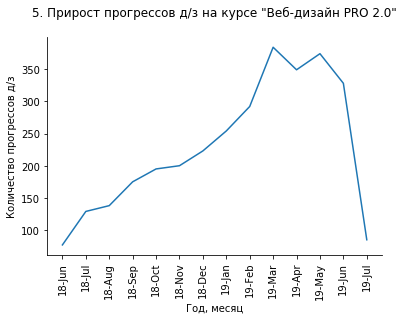

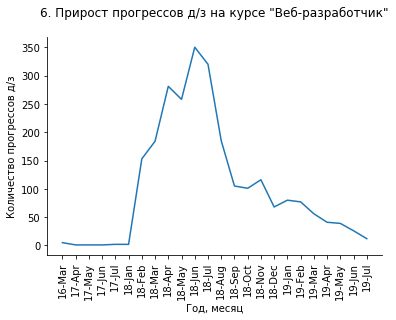

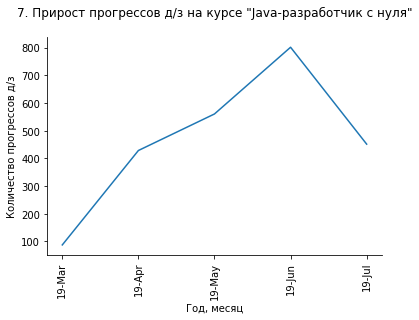

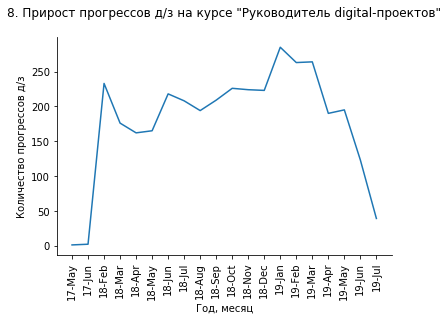

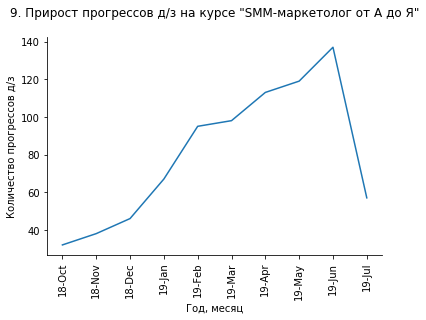

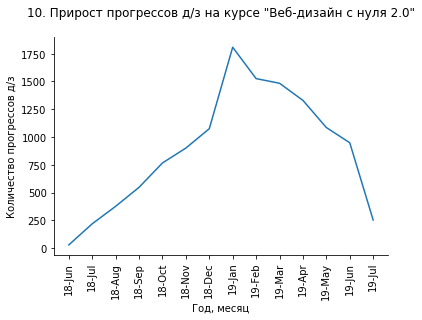

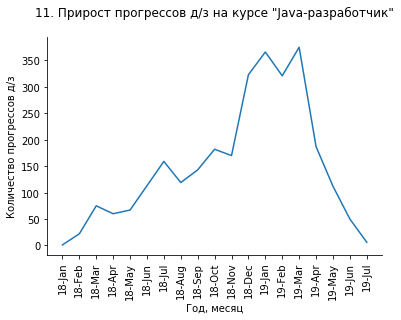

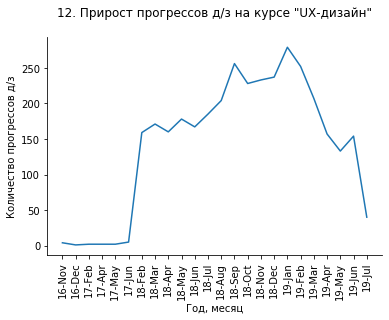

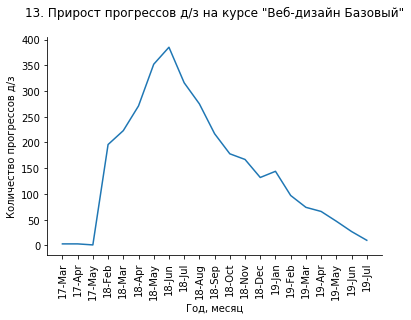

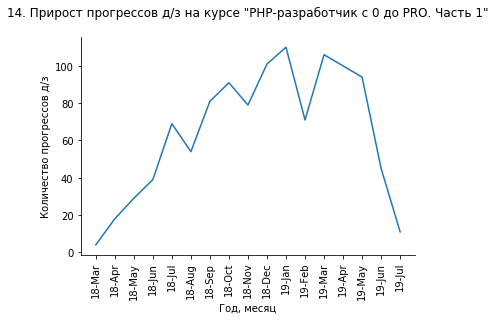

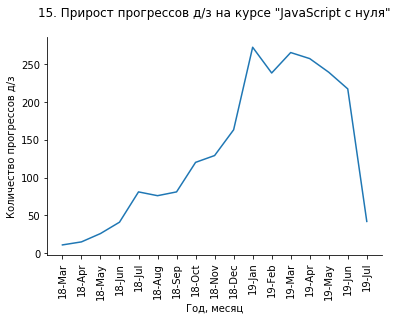

In [9]:
#Задание 2.5
# Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. 
# Ticks нужно развернуть так, чтобы они были читаемы

#для удобства копируем датасет из задания 2.4 и сбрасываем индексы
plots_data=progress_by_month.copy().reset_index()

#формируем список с названиями курсов
titles = list(set(plots_data['title']))

    
#задаем переменную для нумерации графиков
n=1

for title in titles:
    
    #формируем данные для каждого из 15 графиков
    data = plots_data[plots_data['title'] == title]
    
    #при каждой итерации создаем новое полотно
    fig, subplot = plt.subplots()
    
    #устанавливаем наименования осей
    plt.xlabel('Год, месяц')
    plt.ylabel('Количество прогрессов д/з')
    
    #убираем верхнюю и правую границы графика
    subplot.spines['right'].set_visible(False)
    subplot.spines['top'].set_visible(False)
    
    #задаем наименование каждого из 15 графиков
    subplot.set_title(f'{n}. Прирост прогрессов д/з на курсе "{title}"\n')
    
    #формируем линию на графике
    plt.plot(data['start_date'], data['months_homework'])
    
    #задаем подписи оси х
    plt.xticks(np.arange(len(data)), rotation='vertical', labels=data['start_date'])
    
    #сохраняем график (для аналитики)
    plt.savefig(f'Прирост прогрессов дз на курсе {title}.png',bbox_inches='tight')
    
    n+=1

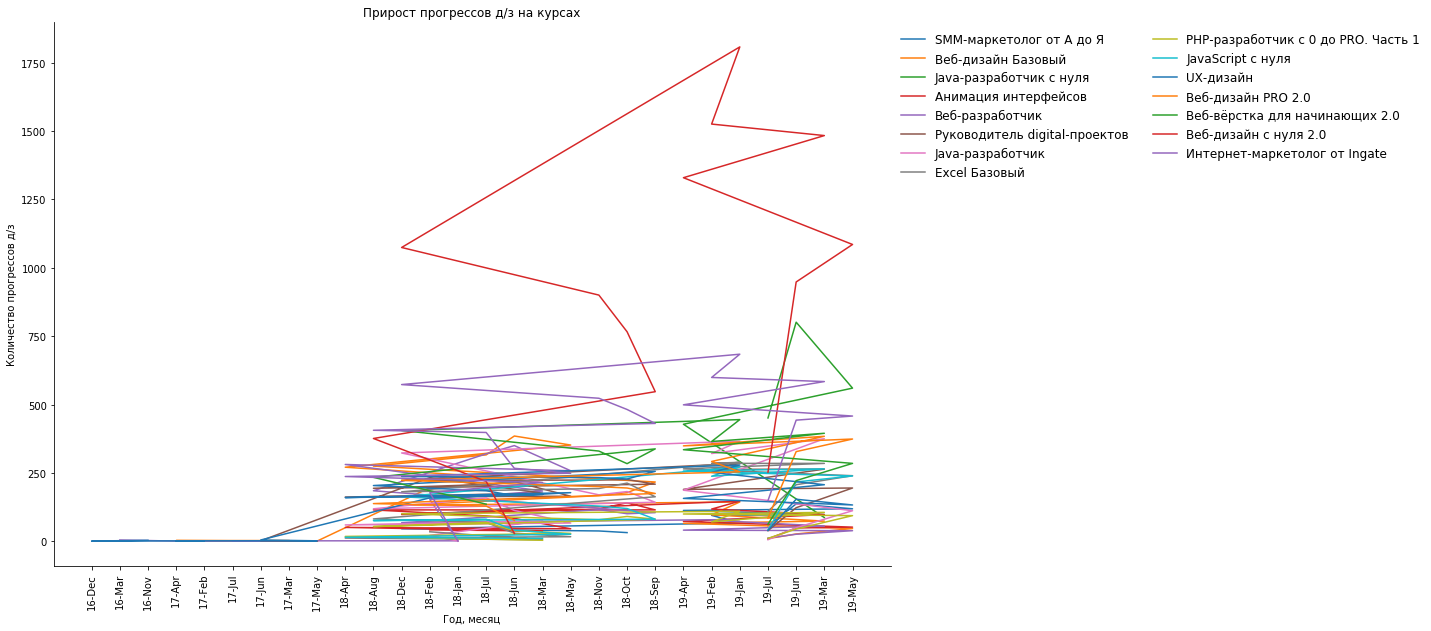

In [41]:
#Задание 2.6
# Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были 
# читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса 
# должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно

x = []
y = []

fig, subplot = plt.subplots(figsize=(15,10))
plt.xlabel('Год, месяц')
plt.ylabel('Количество прогрессов д/з')
subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)
#subplot.set_ylim(0,400)

subplot.set_title('Прирост прогрессов д/з на курсах')

date_list = []
for date in progress_by_month.index:
    date_list.append(str(date[0])[:7])
x_ticks = sorted(list(set(date_list)))     
    
plt.xticks(np.arange(0,len(x_ticks)), rotation='vertical', labels=x_ticks) 


for course in range (0,len(df.index)):
    for row in range (0,len(progress_by_month)):
        if progress_by_month.index[row][1] == df.index[course]:
            y.append(progress_by_month.iloc[row][0])
            x.append(x_ticks.index(str(progress_by_month.index[row][0])[:7]))
    
    plt.plot(x,y)
    x = []
    y = []

plt.legend([i for i in list(df.index)], frameon = False, ncol = 2, fontsize = 'large', bbox_to_anchor=(1, 1))
plt.savefig('Прирост прогрессов дз на курсах.png',bbox_inches='tight')

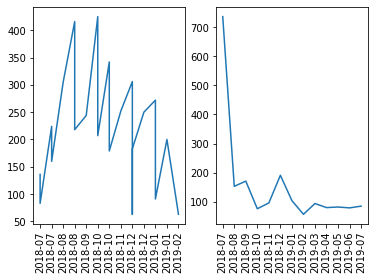

In [25]:
#Для аналитики в 6м задании строю 2 графика рядом для визуального анализа

x = []
y = []

fig = plt.figure()

subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)

subplot1 = fig.add_subplot(121)
for row in range (0,len(progress_count)):
    if progress_count.index[row][1] == "Веб-вёрстка для начинающих 2.0":

        y.append(progress_count.iloc[row][0])
        x.append(str(progress_count.index[row][0])[:7])

plt.xticks(np.arange(0,len(x)), rotation='vertical', labels=x)

subplot1.plot(x,y)

    
    
x1 = []
y1 = []


subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)

subplot2 = fig.add_subplot(122)
for row in range (0,len(growth)):
    if growth.index[row][1] == "Веб-вёрстка для начинающих 2.0":
        subplot.set_title(f'Прирост студентов"\n')
        y1.append(growth.iloc[row][0])
        x1.append(str(growth.index[row][0])[:7])

plt.xticks(np.arange(0,len(x1)), rotation='vertical', labels=x1)


subplot2.plot(x1,y1)

plt.savefig(f'Количество студентов и прогрессов на курсе Веб-вёрстка для начинающих 2.0.png',bbox_inches='tight')


На основе исходных данных был построен общий график по приросту студентов на каждом курсе.
Как видно из графика, резкий прирост студентов наблюдался в июле 2018 года по курсу Веб-вёрстка для начинающих 2.0.
Наименьший прирост студентов на протяжении всего рассматриваемого периода наблюдался на таких курсах, 
как Excel базовый и SMM-маркетолог от А до Я.



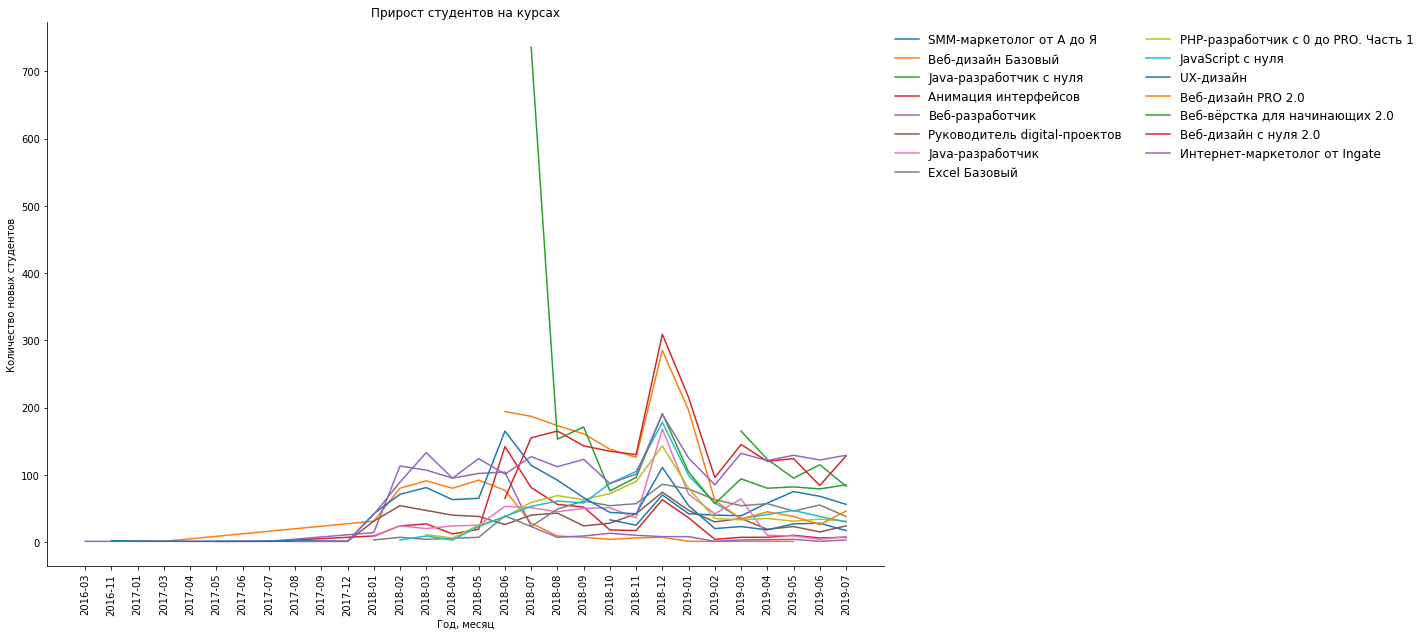


Рассмотрим прирост студентов по курсу Веб-вёрстка для начинающих 2.0 подробнее.


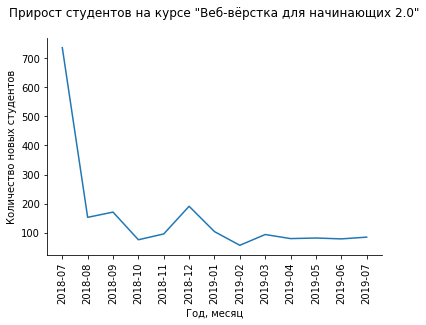

Как уже было отмечено ранее, прирост студентов на курсе Веб-вёрстка для начинающих 2.0 достиг своего пика в более чем 700
студентов в июле 2018 года. В следующие периоды прирост студентов сократился и не превышал 250 студентов в месяц. Начиная с 
марта 2019 года, прирост студентов по данном курсу находился примерно на одном уровне (100 студентов в месяц).


*******************************************************************************************************************************
Далее расмотрим график с приростом прогрессов домашних заданий по всем курсам.



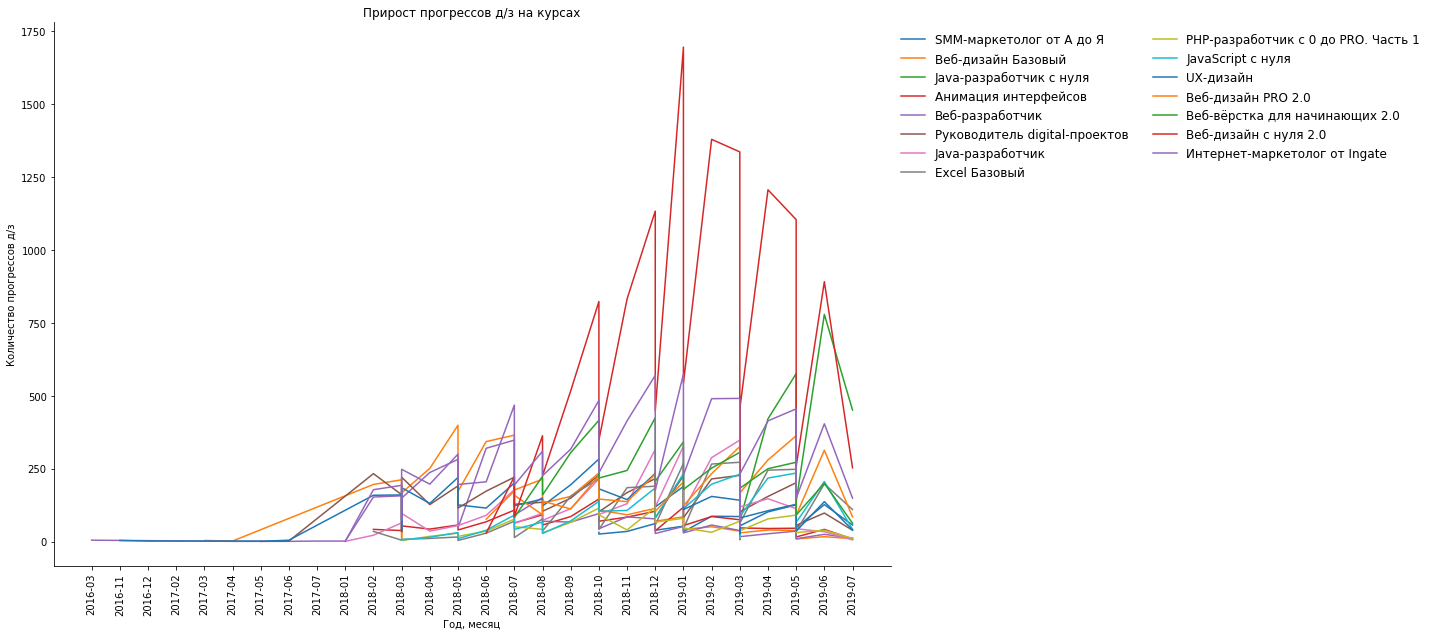

Продемонстрируем взаимосвязь данного графика с графиком по приросту студентов на примере курса Веб-вёрстка 
для начинающих 2.0.



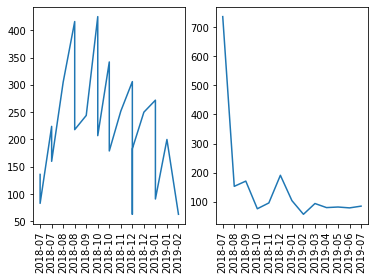

Из графиков видно, что в июле 2018 года к курсу приступило 700 новых студентов, 
а приступило к выполнению дз или закончило его выполнение около 150 студентов. 


In [26]:
#Задание 2.6 
# Аналитика

print('''На основе исходных данных был построен общий график по приросту студентов на каждом курсе.
Как видно из графика, резкий прирост студентов наблюдался в июле 2018 года по курсу Веб-вёрстка для начинающих 2.0.
Наименьший прирост студентов на протяжении всего рассматриваемого периода наблюдался на таких курсах, 
как Excel базовый и SMM-маркетолог от А до Я.\n''')
display(Image(filename='Прирост студентов на курсах.png')) 
print('\nРассмотрим прирост студентов по курсу Веб-вёрстка для начинающих 2.0 подробнее.')
display(Image(filename='Количество студентов на курсе Веб-вёрстка для начинающих 2.0.png')) 
print('''Как уже было отмечено ранее, прирост студентов на курсе Веб-вёрстка для начинающих 2.0 достиг своего пика в более чем 700
студентов в июле 2018 года. В следующие периоды прирост студентов сократился и не превышал 250 студентов в месяц. Начиная с 
марта 2019 года, прирост студентов по данном курсу находился примерно на одном уровне (100 студентов в месяц).\n''')
print(f'\n{"*"*127}')

print('Далее расмотрим график с приростом прогрессов домашних заданий по всем курсам.\n')
display(Image(filename='Прирост прогрессов дз на курсах.png')) 
print('''Продемонстрируем взаимосвязь данного графика с графиком по приросту студентов на примере курса Веб-вёрстка 
для начинающих 2.0.\n''')
display(Image(filename='Количество студентов и прогрессов на курсе Веб-вёрстка для начинающих 2.0.png'))
print('''Из графиков видно, что в июле 2018 года к курсу приступило 700 новых студентов, 
а приступило к выполнению дз или закончило его выполнение около 150 студентов. ''')      


## Выявление проблемных модулей

In [22]:
# Задание 3.1 Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля 
# (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий 
# в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем 
# окончания выполнения последней домашней работы в модуле

#формируем необходимый датасет, удаляем строки с пустыми ячейками. Строки с пустыми значениями дат удаляю, т.к. они не 
#будут участвовать в расчетах

homework_time = main[main.is_homework == True].loc[:, ['title', 'module_title', 'progress_id','start_date', 'finish_date']]
homework_time.dropna(inplace = True)

#Приводим даты к формату datetime. В связи с тем, что необходимо обрабатывать значения NaN, создадим следующую функцию:
def tryconvert(date):
    try:
        date=datetime.datetime.strptime(date[0:10],'%Y-%m-%d').date() 
    except TypeError:
        pass
    return date

homework_time['start_date'] = homework_time['start_date'].map(lambda x: tryconvert(x))
homework_time['finish_date'] = homework_time['finish_date'].map(lambda x: tryconvert(x))

#Учитываем тот факт, что в модуле может быть несколько домашних заданий
#Для этого я написала 2 функции trymin (применяем к start_date) и trymax (применяем к finish_date)

def trymin(dates):
    try:
        return dates.min()
    except:
        pass
    return None

def trymax(dates):
    try:
        return dates.max()
    except:
        pass
    return None

#Применяем созданные функции к датам в датасете
homework_time=homework_time.groupby(['title','module_title','progress_id'], sort=False).agg({'start_date':trymin,'finish_date':trymax})

#Убираем ненужные столбцы
homework_time.reset_index(inplace=True)
homework_time=homework_time.loc[:, ['title', 'module_title', 'start_date', 'finish_date']]
homework_time_v2=homework_time #для задания 3.3

#рассчитываем длительность выполнения дз в днях
homework_time['complete'] = homework_time.apply(lambda x: round((x[3] - x[2])/datetime.timedelta(1)),axis=1)

#применяем агрегирующие функции к столбику 'complete' для расчета необходимых метрик
homework_time = homework_time.groupby(['title', 'module_title']).agg(['min', 'max', 'mean','median']).astype('int')

homework_time.head(100)

# homework_time.to_excel('homework_time.xlsx')


complete  \
                                                                                   min   
title                          module_title                                              
Excel Базовый                   Визуализация данных Excel                            0   
                               Основной функционал Excel                             0   
                               Основной функционал Excel (продолжение)               0   
                               Сводные таблицы Excel                                 0   
                               Формулы и функции Excel. Более сложные формулы        0   
...                                                                                ...   
Веб-вёрстка для начинающих 2.0 Инструменты верстальщика                              2   
                               Основы CSS                                            0   
                               Основы JavaScript                                     0   
                               Оформление                                            0   
Веб-дизайн PRO 2.0              Введение в UX                                        0   

                                                                                    \
                                                                               max   
title                          module_title                                          
Excel Базовый                   Визуализация данных Excel                      175   
                               Основной функционал Excel                       184   
                               Основной функционал Excel (продолжение)         185   
                               Сводные таблицы Excel                           239   
                               Формулы и функции Excel. Более сложные формулы  176   
...                                                                            ...   
Веб-вёрстка для начинающих 2.0 Инструменты верстальщика                        216   
                               Основы CSS                                      290   
                               Основы JavaScript                               289   
                               Оформление                                      236   
Веб-дизайн PRO 2.0              Введение в UX                                  299   

                                                                                    \
                                                                              mean   
title                          module_title                                          
Excel Базовый                   Визуализация данных Excel                       10   
                               Основной функционал Excel                         6   
                               Основной функционал Excel (продолжение)           4   
                               Сводные таблицы Excel                             9   
                               Формулы и функции Excel. Более сложные формулы    7   
...                                                                            ...   
Веб-вёрстка для начинающих 2.0 Инструменты верстальщика                         31   
                               Основы CSS                                       32   
                               Основы JavaScript                                32   
                               Оформление                                       28   
Веб-дизайн PRO 2.0              Введение в UX                                   32   

                                                                                      
                                                                              median  
title                          module_title                                           
Excel Базовый                   Визуализация данных Excel                          5  
                               Основной функционал Excel   

In [ ]:
#Задание 3.2 На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса.
# 15 графиков. Графики должны иметь заголовки

# Примечание: я построила график scatter вместо line, так как это наиболее показательно и т.к. показатели не связаны друг с другом

import random

x=0

for course in range (total_courses):  #количество графиков = количество курсов
    fig, subplot = plt.subplots()
    plt.ylabel('Медианное время прохождения модуля, дни')
    subplot.spines['right'].set_visible(False)
    subplot.spines['top'].set_visible(False)
    plt.xticks([],[])
    
    
    module_list = [] #создаю лист для хранения наименований модулей для добавления легенды ниже
     
    for module in range (len(homework_time)): #количество точек на 1 графике = количество модулей на курсе

        if homework_time.index[module][0] == result.index[course]:
            x += 1 
            y = homework_time.iloc[module][3]
            module_list.append(homework_time.index[module][1])
            r = lambda: random.randint(0,255) 
            dot_color = '#%02X%02X%02X' % (r(),r(),r()) #создаем рандомный цвет для точки
            plt.scatter(x,y, c=dot_color)
    x=0
    module_list = list(set(module_list)) #очищаю список с названиями модулей от дубликатов
    plt.legend(module_list, frameon = False, ncol = 1, fontsize = 'small', bbox_to_anchor=(3, 1)) #создаю легенду
    subplot.set_title(f'Медианное время прохождения модулей на курсе "{result.index[course]}"\n') #указываю название графика
    plt.savefig(f'Медианное время прохождения модулей на курсе {result.index[course]}.png',bbox_inches='tight')
    



In [ ]:
#Задание 3.3 Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам 
#(12 месяцев, январь-декабрь) для каждого курса.

#формируем необходимый дата сет
homework_season = homework_time_v2.loc[:, ['title', 'start_date', 'finish_date']]

#создаем функцию для расчета дней выполнения дз по месяцам по каждому курсу
def count_days(date_start, date_end, course_name):
  
    days=[]
    months=[]
    titles=[]
    
    current_day, current_month, current_year = date_start.day, date_start.month, date_start.year
    end_day, end_month, end_year = date_end.day, date_end.month, date_end.year

    while not(current_month == end_month and current_year == end_year):
        month_length = calendar.monthrange(current_year, current_month)[1] #узнаем количество дней в выбранном месяце
        month_number = current_month 
        days.append(month_length - current_day)
        months.append(month_number)
        titles.append(course_name)
        
       
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
        current_day = 0 # все месяцы кроме первого учитываются полностью, поэтому далее вычитаем 0 из month_length
    else:
        last_month = current_month #отдельно выводим данные по последнему месяцу
        days.append(end_day - current_day)
        months.append(last_month)
        titles.append(course_name)
        
    return days, months, titles

Days=[] #список для хранения количества дней
Months=[] #список для хранения наименования месяцев
Titles=[] #список для хранения наименования курсов

#применяем созданную функцию к нашему датафрему
for i in range(len(homework_season)):
    Day, Month, Title = count_days(homework_season.iloc[i][1], homework_season.iloc[i][2], homework_season.iloc[i][0])
    for i in range (len(Day)): #распаковываем списки из функции, т.к. одно дз могло быть выполнено за несколько месяцев
        Days.append(Day[i])
        Months.append(Month[i])
        Titles.append(Title[i])

        
#создаем датафрейм для сохранения результата
seasonal = pd.DataFrame()
seasonal['Course title']=Titles
seasonal['Month']=Months
seasonal['Median days']=Days

#сортируем данные и номера месяцев заменяем на их названия
seasonal.sort_values(['Course title', 'Month'], inplace=True)
seasonal['Month'] = seasonal['Month'].map(lambda x: calendar.month_name[x])
seasonal=seasonal.groupby(['Course title','Month'], sort=False).agg('median')

#форматируем таблицу для удобства
seasonal=seasonal.unstack(1).fillna(0)

seasonal

In [ ]:
#Задание 3.4 На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным 
#временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. 
# Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). 
# Рамок у графика быть не должно ⭐

import random

x = [] #переменная для хранения координаты по оси абсцисс
y = [] #переменная для хранения координаты по оси ординат

line_types=['b', '--b', 'g', 'r', 'c', 'm', '--m', 'y', 'k', '--k', 'lightslategray', '--r', ':g', 'mediumpurple', 'coral']

fig, subplot = plt.subplots(figsize=(15,10))
plt.ylabel('Время выполнения домашней работы, дней')
subplot.spines['right'].set_visible(False)
subplot.spines['top'].set_visible(False)
subplot.set_title("Медианное время выполнения домашней работы на курсах")

#формируем список подписей оси х и устанавливаем эти подписи
x_labels=[i[1] for i in seasonal.columns]
plt.xticks(np.arange(len(seasonal.columns)), rotation='vertical', labels=x_labels)

y_max=seasonal.describe().max().max()
plt.yticks(np.arange(y_max))

for course in range (len(seasonal)):
    for month in range (len(seasonal.columns)):
            y.append(seasonal.iloc[course,month])
            x.append(month)
    plt.plot(x,y, line_types[course], linewidth=random.randint(2, 3))

    x = []
    y = []

plt.legend([i for i in list(seasonal.index)], frameon = False, ncol = 2, fontsize = 'large', bbox_to_anchor=(0.8, -0.1))
plt.savefig('Медианное время выполнения дз помесячно.png', bbox_inches='tight')

In [ ]:
#Задание 3.5 Аналитика

## Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [13]:
# Задание 4.1. Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. 
# Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько,
# то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, 
# то считать по последнему дз в модуле).

#Задаем переменной значение общего количества курсов (применяем ниже в цикле)
total_courses = len(set(main['title']))

#Формируем начальный датасет
conversion = main[main.is_homework == True].loc[:, ['title', 'progress_id', 'module_title', 'module_number', 'start_date', 'finish_date']]

#Приводим даты к формату datetime. В связи с тем, что необходимо обрабатывать значения NaN, создадим следующую функцию:
def tryconvert(date):
    try:
        date=datetime.datetime.strptime(date[0:10],'%Y-%m-%d').date() 
    except TypeError:
        pass
    return date

conversion['start_date'] = conversion['start_date'].map(lambda x: tryconvert(x))
conversion['finish_date'] = conversion['finish_date'].map(lambda x: tryconvert(x))

#Сортируем датасет по номеру модуля
conversion = conversion.sort_values(['title', 'module_number'])

#Учитываем тот факт, что в модуле может быть несколько домашних заданий
#Для этого я написала 2 функции trymin (применяем к start_date) и trymax (применяем к finish_date) совместно с groupby()

def trymin(dates):
    try:
        return dates.min()
    except:
        pass
    return None

def trymax(dates):
    try:
        return dates.max()
    except:
        pass
    return None

#Применяем созданные функции к датам в датасете
conversion=conversion.groupby(['title','module_title', 'module_number','progress_id'], sort=False).agg({'start_date':trymin,'finish_date':trymax})

#Убираем ненужные столбцы. Module_number оставила, чтобы следить за тем, что сортировка не сбилась.
conversion.reset_index(inplace=True)
conversion=conversion.loc[:, ['title', 'module_title', 'module_number', 'start_date', 'finish_date']]

#Формируем финальный датасет для расчета конверсии
conversion=conversion.groupby(['title','module_title', 'module_number'], sort=False).agg('count')

#Создаем столбик для значений конверсии
conversion['Conversion, %']=0

#Рассчитываем конверсию
for course in range(total_courses):
    for module in range(len(conversion)):     
        if module==0 or conversion.index[module][0]!=conversion.index[module-1][0]:
            conversion.iloc[module,2]=100
        else:
            try:
                conversion.iloc[module,2]=int(conversion.iloc[module][0]/conversion.iloc[module-1][1]*100)
            except:
                conversion.iloc[module,2]=100  

conversion


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in longlong_scalars


start_date  \
title                         module_title                                       module_number               
Excel Базовый                 Основной функционал Excel                          1                     518   
                              Основной функционал Excel (продолжение)            2                     434   
                              Формулы и функции Excel. Введение                  3                     398   
                              Формулы и функции Excel. Продолжаем работать с ... 4                     345   
                              Формулы и функции Excel. Более сложные формулы     5                     298   
...                                                                                                    ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                     95   
                              Интеграционные проекты.                            13                     87   
                              Управление дизайнерами. Разработка дизайна по s... 14                     71   
                              Основы технической грамотности                     15                     66   
                              Контроль. Риски. Поощрения. Наказания. Обратная... 16                     64   

                                                                                                finish_date  \
title                         module_title                                       module_number                
Excel Базовый                 Основной функционал Excel                          1                      458   
                              Основной функционал Excel (продолжение)            2                      406   
                              Формулы и функции Excel. Введение                  3                      387   
                              Формулы и функции Excel. Продолжаем работать с ... 4                      303   
                              Формулы и функции Excel. Более сложные формулы     5                      270   
...                                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                      88   
                              Интеграционные проекты.                            13                      69   
                              Управление дизайнерами. Разработка дизайна по s... 14                      64   
                              Основы технической грамотности                     15                      64   
                              Контроль. Риски. Поощрения. Наказания. Обратная... 16                      58   

                                                                                                Conversion, %  
title                         module_title                                       module_number                 
Excel Базовый                 Основной функционал Excel                          1                        100  
                              Основной функционал Excel (продолжение)            2                         94  
                              Формулы и функции Excel. Введение                  3                         98  
                              Формулы и функции Excel. Продолжаем работать с ... 4                         89  
                              Формулы и функции Excel. Более сложные формулы     5                         98  
...                                                                                                       ...  
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                        96  
                              Интеграционные проекты.                            13                        98  
                              Управление дизайнерами. Разработка дизайна по s... 14                  

In [ ]:
# Задание 4.2. Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 
# График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

# Примечание: я построила 15 графиков, чтобы все было разборчиво.

x=conversion.loc[:,'Conversion, %'][:9]
fig, subplot = plt.subplots()
plt.xticks(np.arange(len(x.index)), rotation='vertical', labels=[i[1] for i in x.index])
plt.bar(np.arange(len(x.index)), x)

## Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [ ]:
1. у которых домашка не выполнена
2. у которых время выполнения домашки превышает медианное
3. те, кто не прошел хотя бы половину курса

In [ ]:
### YOUR CODE HERE ###


